<a href="https://colab.research.google.com/github/ashishdhawas/Churn_Modelling_ANN/blob/main/Churn_Modelling_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [10]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.shape

(10000, 14)

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Exploratory Data Analysis (EDA)

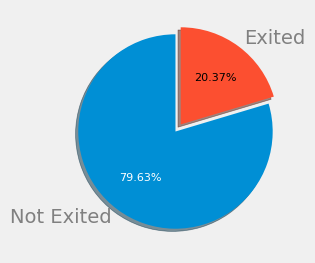

In [17]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

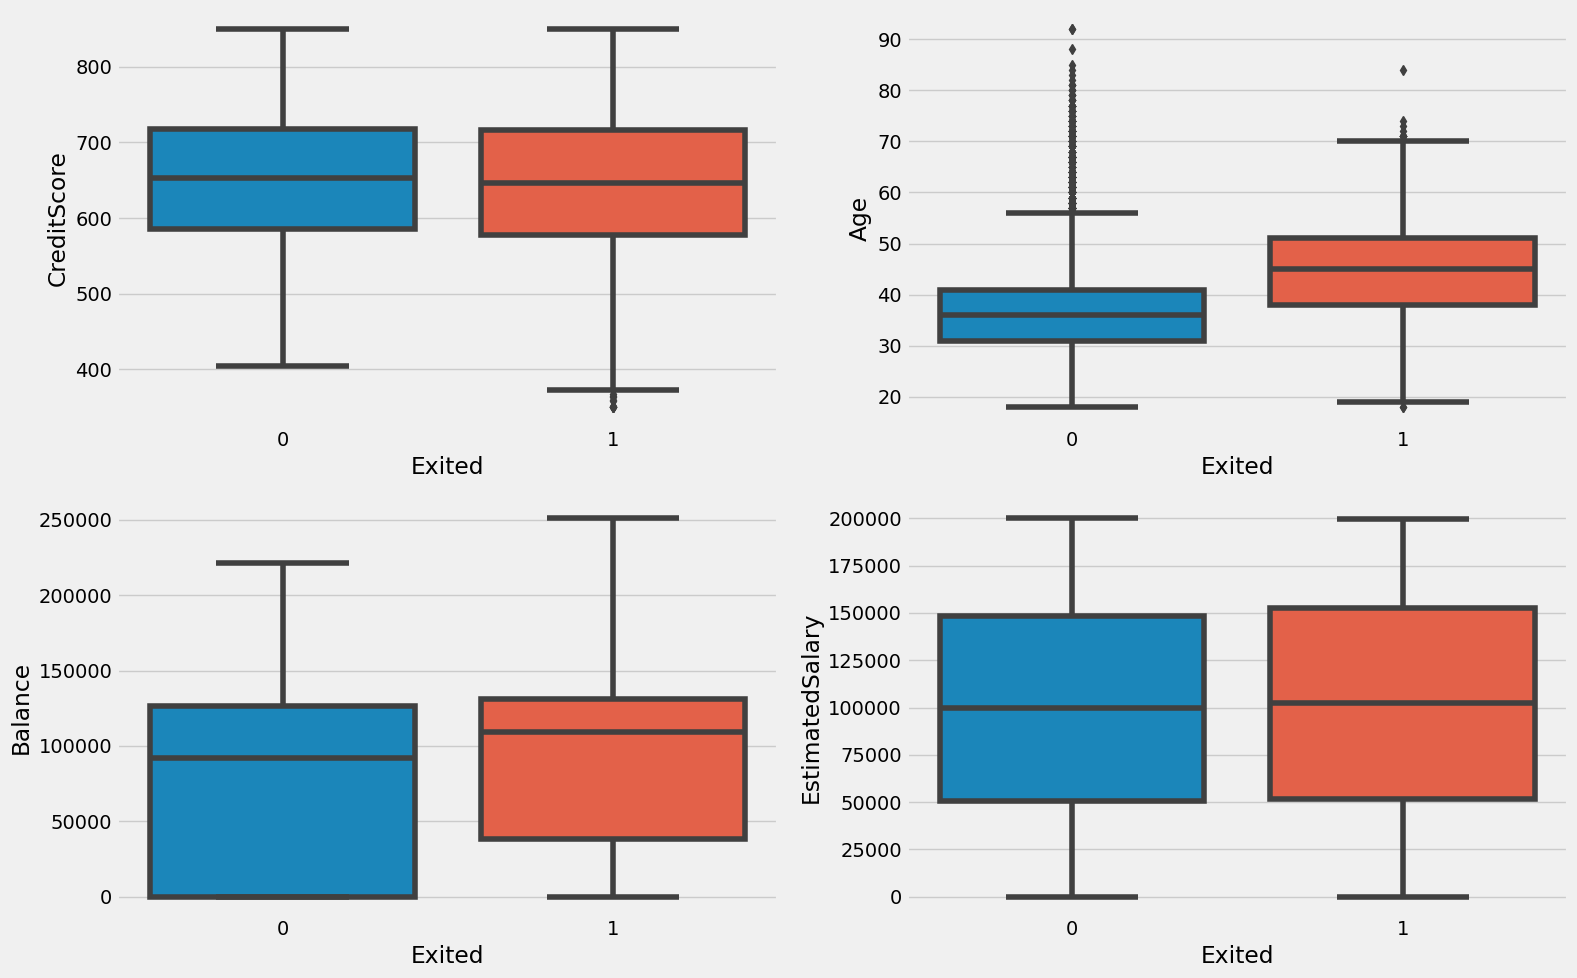

In [23]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

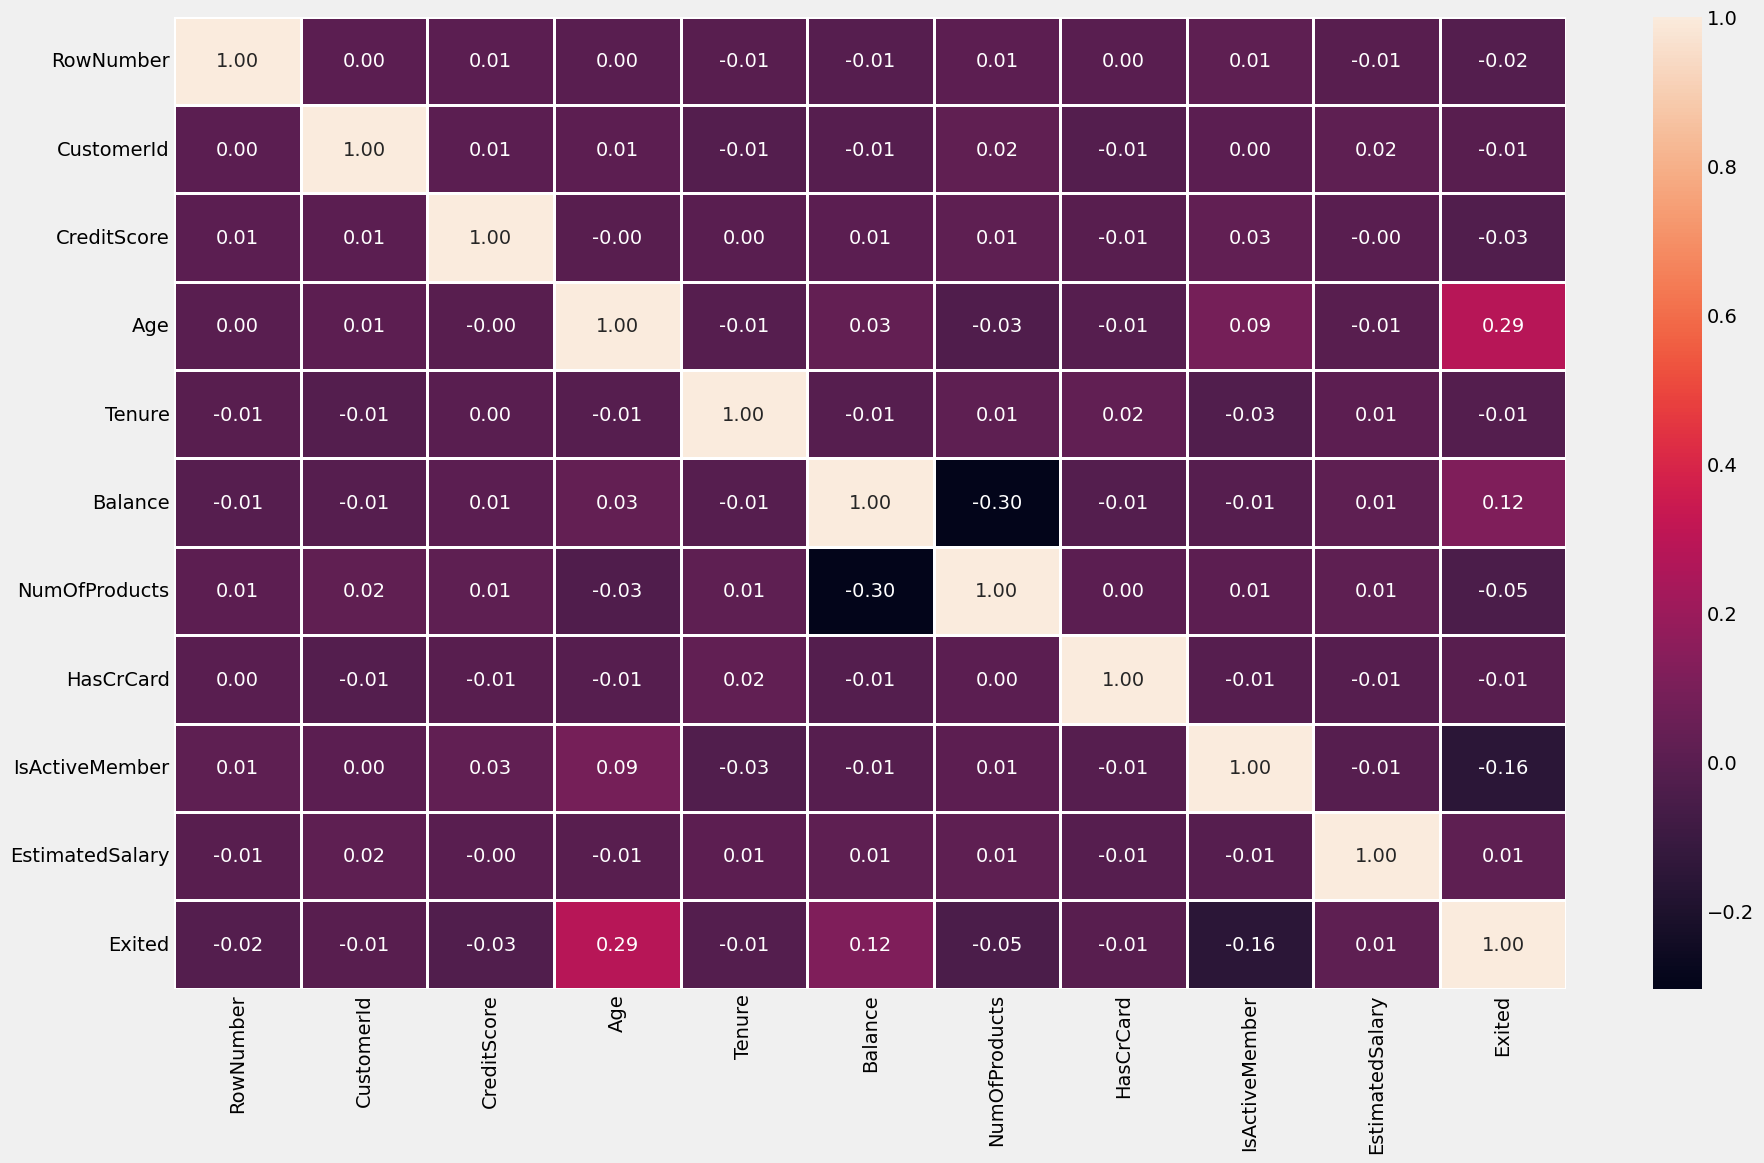

In [24]:
# heatmap

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [25]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [33]:
## divide the dataset into independent and dependent features

X = df.iloc[:,3:13]
y = df.iloc[:,-1]

In [34]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Feature Engineering

In [36]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [38]:
X = X.drop(['Geography','Gender'],axis=1)

In [39]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [42]:
## concatenate these variables with dataframe
X = pd.concat([X,geography,gender],axis=1)

In [43]:
# splitting data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [44]:
# feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
X_train.shape

(8000, 11)

# Building ANN

In [78]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [79]:
# initializing ann
model = Sequential()

In [80]:
# adding the first input layer
model.add(Dense(units = 11, activation = 'relu'))

In [81]:
# adding the first hidden layer
model.add(Dense(units = 7, activation = 'relu'))
model.add(Dropout(rate = 0.2))

In [82]:
# adding the second hidden layer
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dropout(rate = 0.1))

In [83]:
# adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

In [84]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
## Early Stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [85]:
model_history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=10, epochs = 100, callbacks = early_stopping)

Epoch 1/100
640/640 [==============================] - 4s 4ms/step - loss: 0.5078 - accuracy: 0.7855 - val_loss: 0.4641 - val_accuracy: 0.7969
Epoch 2/100
640/640 [==============================] - 3s 5ms/step - loss: 0.4604 - accuracy: 0.7952 - val_loss: 0.4480 - val_accuracy: 0.7969
Epoch 3/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4480 - accuracy: 0.7953 - val_loss: 0.4375 - val_accuracy: 0.7969
Epoch 4/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4372 - accuracy: 0.7958 - val_loss: 0.4312 - val_accuracy: 0.7969
Epoch 5/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4307 - accuracy: 0.7959 - val_loss: 0.4245 - val_accuracy: 0.7969
Epoch 6/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4211 - accuracy: 0.7959 - val_loss: 0.4171 - val_accuracy: 0.7969
Epoch 7/100
640/640 [==============================] - 3s 5ms/step - loss: 0.4163 - accuracy: 0.7994 - val_loss: 0.4078 - val_accuracy: 0.8194

In [86]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

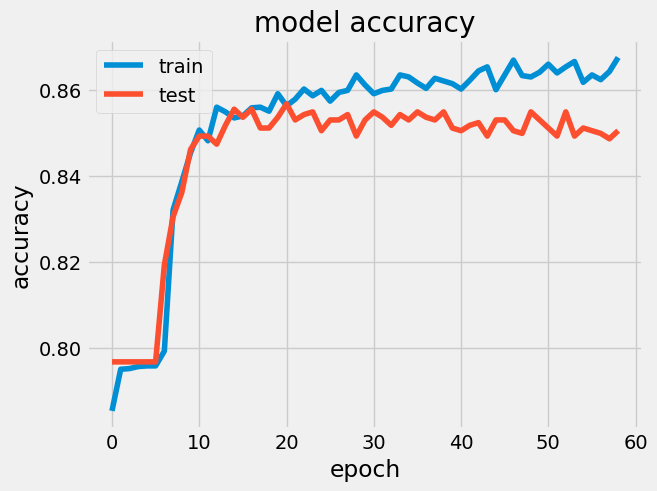

In [87]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

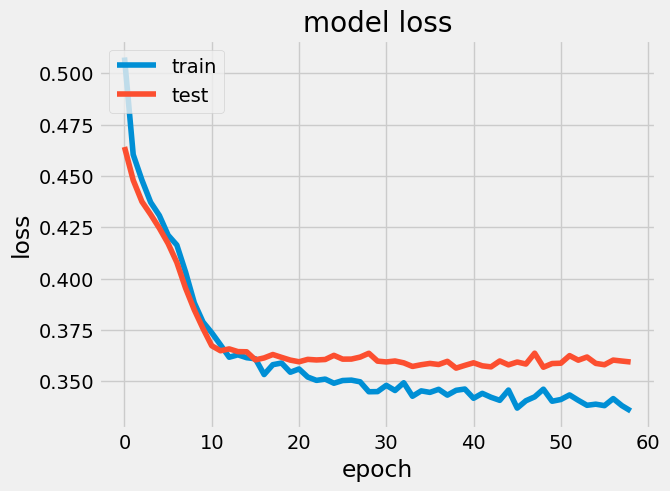

In [88]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

In [89]:
## predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 2ms/step


In [90]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1531,   64],
       [ 213,  192]])

In [91]:
## calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8615

In [92]:
## get the weights
model.get_weights()

[array([[-2.51971096e-01,  1.90792643e-02, -5.46518154e-02,
         -1.88981853e-02, -7.87537694e-02,  2.98790317e-02,
          2.85619527e-01, -1.43688738e-01, -2.40939632e-02,
          1.29913121e-01,  4.97136950e-01],
        [-5.27459085e-01, -9.53806877e-01,  6.36514425e-01,
         -6.11016154e-01,  2.51230467e-02,  5.19473851e-01,
          4.47091818e-01,  4.55472432e-03,  2.16315717e-01,
         -7.52933502e-01, -3.71748030e-01],
        [-2.04959601e-01,  1.23665534e-01,  4.48703878e-02,
          5.09581976e-02, -1.64803527e-02,  1.90001931e-02,
          1.65980458e-02, -3.52151453e-01, -2.38456763e-02,
          1.71799827e-02, -8.60603759e-04],
        [ 2.14303523e-01, -6.15138471e-01, -5.73129475e-01,
         -5.45672476e-01, -9.53070760e-01,  1.49032203e-02,
          7.79458046e-01,  2.00174570e-01, -9.47217047e-02,
         -3.93067211e-01, -4.88201417e-02],
        [ 4.99961786e-02,  3.77829485e-02, -1.14316553e-01,
         -1.59003422e-01, -1.20415008e+00,  